<a href="https://colab.research.google.com/github/EyberRosero/Analitica-De-Datos/blob/master/Tarea2_(metodos_de_clasificaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de clase lfw_people - Comparación de distintos métodos de clasificación

Los clasificadores que se van a usar en este cuaderno son los siguientes:

* Gaussian Naive Bayes
* Stochastic Gradient Descent
* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* K-Neighbors 
* Logistics Regression
* Support Vector 
* Random Forest 

Los modelos matemáticos de los clasificadores son los siguientes: 

## Gaussian Naive Bayes

Se basa en el supuesto "ingenuo" (naive) de independencia condicional entre cada par de características dado el valor de la variable de la clase. El teorema de Bayes establece la siguiente relación

$$P(y|x_1,...,x_n) = \frac{P(y)P(x_1,...,x_n|y)}{P(x_1,...,x_n)}$$

Donde $y$ es la variable de la clase y x el vector de características.

Usando la suposición de independencia condicional ingenua

$$P(x_i|y,x_1,...,x_{i-1},x_{i+1},...,x_n) = P(x_i|y$$

Para todos los i esto se simplifica a

$$P(y|x_1,...,x_n) = \frac{P(y)\prod_{i=1}^{n}P(x_i|y)}{P(x_1,...,x_n)}$$


Como $P(x_1,...,x_n)$ es constante, se puede considerar:

$$P(y|x_1,...,x_n) \propto P(y)\prod_{i=1}^{n}P(x_i|y)$$

Por lo tanto:

$$\hat{y} = \underset{y}{argmax} P(y)\prod_{i=1}^{n}P(x_i|y)$$

Y se puede usar la estimación del máximo A posteriori, para estimar $P(y)$ y $P(x_i|y)$.

Los diferentes clasificadores ingenuos de Bayes difieren principalmente por los supuestos que hacen con respecto a la distribución de $P(x_i|y)$

El Gaussian Naive Bayes supone que $P(x_i|y)$ es gaussiana

$$P(x_i|y) = \frac{1}{\sqrt{2\pi{{\sigma}_{y}^{2}}}} exp \left( -\frac{{(x_i-{\mu}_{y})}^{2}}{2{{\sigma}_{y}^{2}}} \right)$$

Los parámetros ${\sigma}_{y}$ y ${\mu}_{y}$ se estiman usando la máxima verosimilitud.

## Stochastic Gradient Descent


Estrictamente hablando, SGD es simplemente una técnica de optimización y no corresponde a una familia específica de modelos de aprendizaje automático. Es solo una forma de entrenar a un modelo. A menudo, una instancia de SGDClassifier o SGDRegressor tendrá un estimador equivalente en la API scikit-learn, posiblemente utilizando una técnica de optimización diferente. Por ejemplo, el uso de SGDClassifier (loss = 'log') da como resultado una regresión logística, es decir, un modelo equivalente a LogisticRegression que se ajusta a través de SGD en lugar de ser ajustado por uno de los otros solucionadores en LogisticRegression.

La clase SGDClassifier implementa una rutina de aprendizaje de descenso de gradiente estocástico simple que admite diferentes funciones de pérdida y penalizaciones para la clasificación.

El objetivo de este clasificador es aprender una fución de puntuación lineal $f(x) = w^Tx+b$ para hacer predicciones para realizar clasificación binaria. Para encontrar los parámetros del modelo, se minimiza el error de entrenamiento regularizado dado por: $$\theta^* = \frac{1}{n}\sum_{i=1}^{n}L(y_i,f(x_i)) + \alpha R(\omega)$$ donde **L** es una función de error que mide el ajuste del modelo y **R** es el término de regularización que penaliza la complejidad del modelo; **$\alpha > 0$** es un hiperparámetro que controla la fuerza de regularización.

El clasificador admite diferentes funciones de pérdida:

* Hinge: (soft-margin)

 $$L(y_i,f(x_i)) = max(0, 1 - y_if(x_i))$$

* Perceptron: $$L(y_i,f(x_i)) = max(0, - y_if(x_i))$$

* Modified Huber: smoothed hinge loss 
    
$$L(y_i,f(x_i)) = \begin{cases} {max(0, 1-y_if(x_i))}^{2} \quad si \quad y_if(x_i) > 1\\ -4y_if(x_i) \quad otherwise \end{cases}$$
    
* Log: logistic regression $$L(y_i,f(x_i)) = log(1 + exp(-y_if(x_i)))$$

* Least-Squares: Linear regression (Ridge o Lasso dependiendo del R) $$L(y_i,f(x_i)) = \frac{1}{2}{y_i-f(x_i)}^{2}$$

* Huber: menos sensitivo que Least-Squares a los valores atípicos.

$$L(y_i,f(x_i)) = \begin{cases} Least-Squares \quad si \quad |y_i - f(x_i)| \leq \epsilon \\
\epsilon|y_i-f(x_i)| - \frac{1}{2}{\epsilon}^{2} \quad otherwise \end{cases}$$
    
* Epsilon-Insensitive: (soft-margin) Support Vector Regression $$L(y_i,f(x_i)) = max(0, |y_i-f(x_i)|-\epsilon)$$

Entre las opciones más escogidas para el término de regularización se encuentran:

* Norma ${\ell}_{2}: R(\omega) := \frac{1}{2}\sum_{j=1}^{m}{\omega_j}^{2} = {\|\omega\|}_{2}^{2}$
* Norma ${\ell}_{1}: R(\omega) := \sum_{j=1}^{m}|\omega_j|$, lleva a soluciones dispersas
* Elastic Net: $R(\omega) := \frac{\rho}{2}\sum_{j=1}^{n}{\omega_j}^{2} + (1-\rho)\sum_{j=1}^{m}|\omega_j|$, una combinación convexa de $\ell_2$ y $\ell_1$, donde $\rho$ está dado por 1 - l1_ratio.

SGDClassifier admite la clasificación de varias clases mediante la combinación de múltiples clasificadores binarios en un esquema "uno contra todos" (OVA). Para cada una de las clases, se aprende un clasificador binario que discrimina entre esa y todas las demás clases. En el momento de la prueba, calculamos el puntaje de confianza (es decir, las distancias firmadas al hiperplano) para cada clasificador y elegimos la clase con la mayor confianza.

## Linear Discriminant Analysis


Se deriva de modelos probabilísticos simples que modelan la distribución condicional de clase de los datos P(X|y). Las predicciones pueden ser obtenidas usando la regla de Bayes y se selecciona la clase que maximice esta probabilidad posterior.

Se modela la probabilidad P(x|y)como una distribución Gaussiana multivariada con densidad:

$$P(x|y) = \frac{1}{{(2\pi)}^{\frac{n}{2}}{|\sum_{y}|}^{\frac{1}{2}}} exp\left( -\frac{1}{2}{(x-\mu_y)}^{T}\sum_{y}^{-1}(x-\mu_y) \right)$$

Se asume que las las Gausianas comparten la misma matriz de covarianza. EL log-posterior queda de la forma:

$$logP(y|x) = - \frac{1}{2}{(x-\mu_y)}^{T}\sum_{y}^{-1}(x-\mu_y) + logP(y) + Cst$$

El término ${(x-\mu_y)}^{T}\sum_{y}^{-1}(x-\mu_y)$ corresponde a la distancia de Mahalanobis entre la muestra x y la media $\mu$ de la clase. En LDA se asigna la muestra x a la clase cuya media sea la más cercana en términos de la distancia de Mahalanobis, mientras que cuenta las probabilidades previas de la clase (priors).

## Quadratic Discriminant Analysis

Se fundamenta de la misma manera que el Linear Discriminant Analysis

$$logP(y|x) = logP(x|y) + logP(y) + Cst = -\frac{1}{2}log\left|\sum_y\right| - \frac{1}{2}{(x-\mu_y)}^{T}\sum_{y}^{-1}(x-\mu_y) + logP(y) + Cst $$

donde la constante Cst corresponde al denominador de la relación de Bayes **P(x)**, adicionado a otras constantes de la Gaussiana. La clase predicha es la que maximiza el log-posterior

Si en este modelo se asume que las matrices de covarianza son diagonales, entonces las entradas se asumen condicionalmente independiente en cada clase, y el resultado de clasificador es equivalente al *Gaussian Naive Bayes*

## K-Neighbors Classifier

La clasificación se calcula a partir de un voto de mayoría simple de los vecinos más cercanos de cada punto: a un punto de consulta se le asigna la clase de datos que tiene la mayor cantidad de representantes dentro de los vecinos más cercanos del punto.

KNeighborsClassifier implementa el aprendizaje basado en los k vecinos más cercanos de cada punto de consulta, donde k es un valor entero especificado por el usuario.

## Logistic Regression

En el caso de multiclase, el algoritmo de entrenamiento usa el esquema de uno contra todos (OvA) si la opción 'multi_class' está configurada en 'ovr', y usa la pérdida de entropía cruzada si la opción 'multi_class' está configurada en 'multinomial '.

Los solucionadores 'newton-cg', 'sag' y 'lbfgs' solo admiten la regularización L2 con formulación primaria, o no regularización. El solucionador "liblinear" admite la regularización de L1 y L2, con una formulación dual solo para la penalización de L2. La regularización de Elastic-Net solo es compatible con el solucionador de "saga"

Usando la penalización $\ell_2$, se optimiza la función de costo $$\underset{\omega,c}{min}\frac{1}{2}\omega^T\omega + C\sum_{i=1}^{n}log(exp(-y_i(X^T_i\omega + c))+1)$$

De manera similar, usando la penalización $\ell_2$ se resuelve el problema de optimización $$\underset{\omega,c}{min} \|\omega\|_1 + C\sum_{i=1}^{n}log(exp(-y_i(X^T_i\omega + c))+1)$$

Elastic-Net utiliza una combinación de $\ell_1$ y $\ell_2$ y la función de costo es $$\underset{\omega,c}{min} \frac{1-\rho}{2}\omega^T\omega + \rho\|\omega\|_1 + C\sum_{i=1}^{n}log(exp(-y_i(X^T_i\omega + c))+1)$$ donde $\rho$ controla la regularización.

## Support Vector Classifier


Una máquina de vectores de soporte construye un hiperplano o un conjunto de hiperplanos en un espacio dimensional alto o infinito, que puede usarse para clasificación, regresión u otras tareas. Intuitivamente, se logra una buena separación mediante el hiperplano que tiene la mayor distancia a los puntos de datos de entrenamiento más cercanos de cualquier clase (denominado margen funcional), ya que en general cuanto mayor es el margen, menor es el error de generalización del clasificador. 

El objetivo es encontrar $\omega$ y b tal que la predicción dada por $sign(w^T\phi(x)+b)$ sea correcta para la mayoría de las muestras

$$\underset{\omega,b,\zeta}{min}\frac{1}{2}\omega^T\omega + C\sum_{i=1}^{n}\zeta_i$$

sujeto a $\quad y_i(\omega^T\phi(x_i)+b) \geq 1 - \zeta_i, \quad \zeta_i \geq 0, \quad i=1,...,n$


Funciones kernel:

* linear: $$\langle x,{x}^{'} \rangle$$

* polynomial: $$(\gamma\langle x,{x}^{'} \rangle + r)^d$$ donde **$\gamma$** se especifica en el parámetro *gamma*, este debe ser mayor a 0. El valor de **d** se especifica en el parámetro *degree*, y **r** en *coef0*

* rbf: $$exp(-\gamma{\|x-{x}^{'}\|}^{2})$$

* sigmoid: $$tanh(\gamma\langle x,{x}^{'} \rangle + r)$$

## Random Forest Classifier


Random Forest es un tipo de algoritmo supervisado de aprendizaje automático basado en el aprendizaje conjunto, que soluciona el problema que tienen los árboles de decisión de no servir para reproducir escenarios predictivos what-if. Con Random Forest se puede conocer la importancia de cada variable.

# Se cargan las funciones principales a utilizar sobre el cuaderno 

In [0]:
import os
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.base import  BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from numpy.linalg import det, inv
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import mahalanobis
from scipy.stats import multivariate_normal as mn

#para acceder a archivos desde google drive en google colaboratory
#acceso a google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1TDxi5fWoS1zraYYsk0IfoVB0XQt--HJw' #copiar nombre nombre del link de compartir despues de ID
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('funciones_people.py') 

from funciones_people import pre_exploratorio, save_fig, plot_confusion_matrix, roc_multiclass, roc_auc_mc

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline



#Se hace la lectura de la base de datos (lfw_people) y se convierte los datos a tipo pandas 

In [5]:
%matplotlib inline

#base de datos
from sklearn.datasets import fetch_lfw_people

#descargar base de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


Dimensiones tipo pandas:  (1288, 1850)


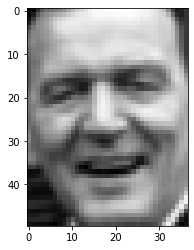

In [6]:
# datos tipo pandas
Xdata = pd.DataFrame(lfw_people.data)
y = lfw_people.target
print('Dimensiones tipo pandas: ',Xdata.shape)
plt.imshow(np.array(Xdata.iloc[7,:]).reshape(lfw_people.images.shape[1],lfw_people.images.shape[2]),cmap='gray')


##Partición conjunto de entrenamiento y conjunto de evaluación

Nota: conjunto de evaluación no se utiliza en NINGUNA etapa de entrenamiento 

In [7]:
#Paso 2: Particion entrenamiento y validacion
# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, ytrain,ytest = train_test_split(Xdata,y,test_size=0.3) #fijar en 0.3 para entrenar -- 0.95 para demostrar funcionalidad del código

Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
539,87.000000,93.000000,102.333336,116.000000,121.000000,119.666664,123.000000,133.000000,137.666672,135.333328,141.666672,147.333328,151.000000,151.666672,150.000000,148.666672,144.000000,144.000000,147.666672,150.000000,147.666672,150.333328,163.333328,181.000000,196.000000,201.000000,179.333328,122.666664,87.666664,114.666664,137.666672,126.333336,106.666664,74.333336,30.333334,16.000000,16.666666,95.666664,113.333336,122.666664,...,81.666664,77.333336,80.333336,51.333332,113.000000,201.666672,195.333328,146.333328,117.000000,117.666664,118.666664,110.000000,104.000000,101.000000,99.666664,102.333336,103.000000,109.666664,114.333336,113.666664,105.333336,107.333336,109.000000,102.000000,93.666664,88.000000,78.000000,70.000000,64.000000,72.333336,87.000000,110.666664,149.666672,171.333328,60.000000,49.666668,65.000000,75.666664,76.000000,75.666664
70,85.666664,125.000000,164.666672,180.333328,190.666672,195.000000,199.333328,201.333328,201.666672,204.666672,214.333328,224.333328,233.333328,226.333328,224.333328,223.000000,214.333328,211.333328,204.333328,192.666672,184.333328,175.333328,168.000000,162.666672,155.000000,149.333328,146.000000,142.000000,137.000000,127.333336,105.000000,61.000000,39.000000,31.333334,30.000000,28.666666,33.000000,95.666664,151.000000,180.000000,...,130.666672,151.666672,160.000000,168.666672,179.000000,165.000000,126.000000,112.333336,111.333336,183.333328,187.666672,91.666664,60.333332,50.666668,59.333332,77.333336,86.000000,86.666664,85.000000,87.000000,89.666664,89.000000,89.333336,89.666664,87.000000,84.666664,81.333336,79.000000,75.333336,70.666664,69.000000,67.000000,66.333336,60.000000,61.000000,90.000000,128.000000,148.000000,157.000000,164.666672
393,9.666667,9.000000,8.333333,9.666667,11.000000,11.666667,12.666667,20.666666,125.666664,201.000000,185.000000,172.666672,171.666672,168.333328,167.666672,167.333328,167.333328,167.000000,164.000000,155.000000,154.333328,152.333328,148.666672,139.333328,136.333328,134.000000,130.333328,124.000000,120.000000,115.666664,110.000000,105.333336,103.666664,105.666664,106.666664,110.333336,106.000000,9.666667,8.666667,7.666667,...,72.666664,74.666664,73.666664,8.000000,10.000000,11.000000,12.000000,14.000000,12.666667,10.333333,13.000000,14.000000,12.333333,34.333332,126.000000,137.000000,131.666672,128.333328,123.000000,119.000000,106.666664,97.333336,91.666664,94.333336,93.666664,88.000000,79.666664,75.333336,70.333336,71.333336,76.666664,78.000000,81.333336,85.666664,86.666664,80.333336,76.000000,74.333336,74.333336,70.666664
116,93.333336,102.000000,115.000000,128.333328,135.333328,136.666672,137.000000,137.666672,142.000000,142.333328,142.000000,140.666672,141.666672,141.333328,139.000000,136.666672,136.666672,138.000000,140.000000,138.000000,139.333328,142.333328,146.000000,145.000000,142.000000,139.333328,134.000000,127.333336,124.000000,117.666664,113.333336,112.000000,107.000000,86.000000,60.666668,84.333336,83.000000,99.000000,107.000000,120.666664,...,25.333334,26.000000,25.333334,210.333328,212.333328,214.666672,218.666672,200.333328,153.333328,118.000000,110.000000,109.000000,109.333336,110.333336,112.666664,112.000000,106.333336,102.000000,107.333336,110.333336,114.333336,115.000000,115.333336,114.333336,106.333336,103.000000,106.666664,104.000000,102.333336,133.333328,183.666672,202.666672,195.666672,122.666664,33.000000,23.000000,23.000000,25.333334,25.000000,24.666666
884,0.666667,2.333333,6.333333,13.000000,21.000000,22.000000,20.333334,37.000000,108.333336,152.000000,163.666672,168.000000,174.000000,178.000000,177.333328,178.000000,178.000000,175.000000,174.333328,173.000000,170.333328,163.000000,157.000000,150.333328,148

# Se realiza el análisis exploratorio 

[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 901 samples in 0.159s...
[t-SNE] Computed neighbors for 901 samples in 3.021s...
[t-SNE] Computed conditional probabilities for sample 901 / 901
[t-SNE] Mean sigma: 14.445204
[t-SNE] Computed conditional probabilities in 0.057s
[t-SNE] Iteration 50: error = 75.0770493, gradient norm = 0.3501783 (50 iterations in 0.375s)
[t-SNE] Iteration 100: error = 74.1776886, gradient norm = 0.3582813 (50 iterations in 0.355s)
[t-SNE] Iteration 150: error = 73.7918091, gradient norm = 0.3606799 (50 iterations in 0.383s)
[t-SNE] Iteration 200: error = 75.7498932, gradient norm = 0.3355119 (50 iterations in 0.396s)
[t-SNE] Iteration 250: error = 74.5424805, gradient norm = 0.3577308 (50 iterations in 0.380s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.542480
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317043567980705675258449965989174768031572607800285387605895586327668781715404589535143824

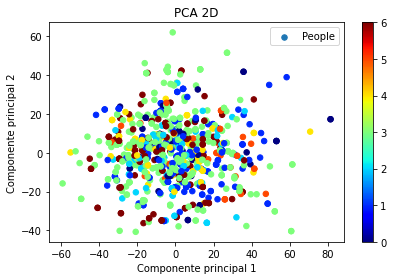

Guardando... relevancia_PCA_eigenface


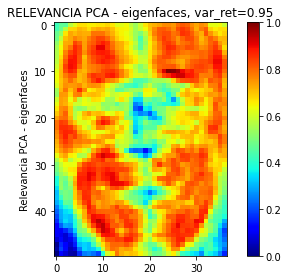

Guardando... tsne_2D


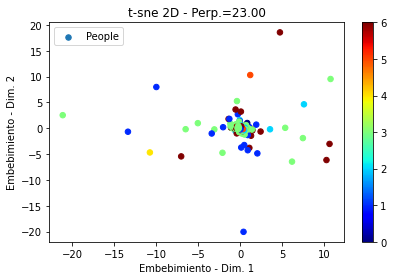

True

In [8]:
#%% Paso 3 : Analisis exploratorio
#preproceso entrada  y salida para analisis exploratorio
img_path = '' #para guardar from google.colab import files plt.savefig("abc.png") files.download("abc.png") 
pre_exploratorio(Xtrain,ytrain,img_path,'People',lfw_people.images.shape[1],lfw_people.images.shape[2])

# Se declaran los modelos por dridsearchCV 

In [0]:
#%% Paso 4 : Escoger modelo por gridsearchCV utilizando pipeline
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib #https://joblib.readthedocs.io/en/latest/

steps=[
       [('rep',  PCA()),
        ('cla', GaussianNB())],
       
       [('rep',  PCA()),
        ('cla', SGDClassifier(loss='log'))],
       
       [('rep',  PCA()),
        ('cla', LinearDiscriminantAnalysis(solver='svd'))],

       [('rep',  PCA()),
        ('cla', LinearDiscriminantAnalysis(solver='eigen',
                                           shrinkage='auto'))],
       
       [('rep',  PCA()),
        ('cla', QuadraticDiscriminantAnalysis())],

       [('rep',  PCA()),
        ('cla', KNeighborsClassifier(algorithm='auto'))],
       
       [('rep',  PCA()),
        ('cla', LogisticRegression(solver='lbfgs'))],
       
       [('rep',  PCA()),
        ('cla', SVC(kernel='rbf'))],
       
       [('rep',  PCA()),
        ('cla', RandomForestClassifier(max_features='auto'))],
       
      ]


parameters = [
              
              {
              'rep__n_components': [0.1, 0.5, 0.9]        
              },    
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__alpha': [0.0001, 0.1, 0.5, 1]    
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9]        
              },

              {
              'rep__n_components': [0.1, 0.5, 0.9]        
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__reg_param': [0, 0.5, 1]
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__n_neighbors': [0.1, 1, 3, 5]
              },

              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__C': [0.1, 0.5, 1]
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__C': [0.1, 0.5, 1]
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__n_estimators': [20, 100, 300, 500]
              },
    
             ]

label_models = ['Naive_GaussianNB','SGDlog',
                'LDAsvd','LDAeigen','QDA','KNeighbors','Logisticlbfgs',
                'SVCrbf','RandomForest']



In [10]:
best_model = []
filename = ''#'resultados/people_comp'
for i in range(len(steps)):
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='balanced_accuracy',verbose=10)
    grid_search.fit(Xtrain, ytrain)
    #print(grid_search.cv_results_)
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]
    joblib.dump(best_model,filename+".pkl")

print('Mejores modelos:\n')
best_model

modelo 1/9
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.5s finished


modelo 2/9
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   23.3s finished


modelo 3/9
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.2s finished


modelo 4/9
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.4s finished


modelo 5/9
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   16.1s finished


modelo 6/9
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   21.3s finished


modelo 7/9
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   18.6s finished


modelo 8/9
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   17.8s finished


modelo 9/9
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   56.2s finished


Mejores modelos:



[Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla', GaussianNB(priors=None, var_smoothing=1e-09))],
          verbose=False), Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla',
                  SGDClassifier(alpha=1, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.0,
                                fit_intercept=True, l1_ratio=0.15,
                                learning_rate='optimal', loss='log',
                                max_iter=1000, n_iter_no_change=5, n_jobs=None,
                                penalty='l2', power

# Calcular rendimiento en cojunto de test

Evaluando modelo 1/9
Guardando... Naive_GaussianNB


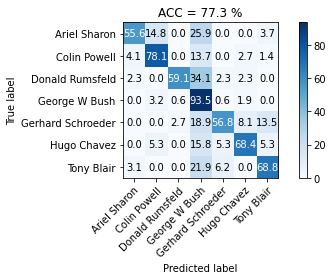

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.56      0.64        27
     Colin Powell       0.85      0.78      0.81        73
  Donald Rumsfeld       0.93      0.59      0.72        44
    George W Bush       0.75      0.94      0.83       155
Gerhard Schroeder       0.81      0.57      0.67        37
      Hugo Chavez       0.59      0.68      0.63        19
       Tony Blair       0.73      0.69      0.71        32

         accuracy                           0.77       387
        macro avg       0.77      0.69      0.72       387
     weighted avg       0.78      0.77      0.77       387

Evaluando modelo 2/9
Guardando... SGDlog


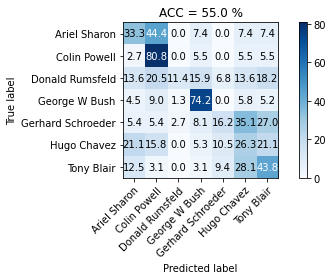

                   precision    recall  f1-score   support

     Ariel Sharon       0.26      0.33      0.30        27
     Colin Powell       0.59      0.81      0.68        73
  Donald Rumsfeld       0.62      0.11      0.19        44
    George W Bush       0.86      0.74      0.80       155
Gerhard Schroeder       0.43      0.16      0.24        37
      Hugo Chavez       0.10      0.26      0.15        19
       Tony Blair       0.28      0.44      0.34        32

         accuracy                           0.55       387
        macro avg       0.45      0.41      0.38       387
     weighted avg       0.62      0.55      0.55       387

Evaluando modelo 3/9
Guardando... LDAsvd


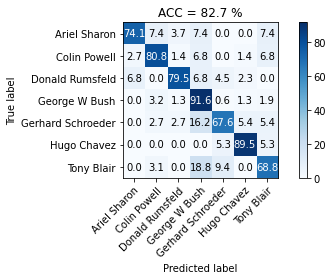

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.74      0.77        27
     Colin Powell       0.87      0.81      0.84        73
  Donald Rumsfeld       0.88      0.80      0.83        44
    George W Bush       0.87      0.92      0.89       155
Gerhard Schroeder       0.78      0.68      0.72        37
      Hugo Chavez       0.74      0.89      0.81        19
       Tony Blair       0.63      0.69      0.66        32

         accuracy                           0.83       387
        macro avg       0.79      0.79      0.79       387
     weighted avg       0.83      0.83      0.83       387

Evaluando modelo 4/9
Guardando... LDAeigen


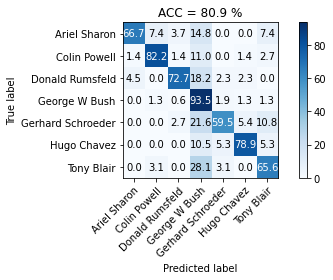

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.67      0.75        27
     Colin Powell       0.92      0.82      0.87        73
  Donald Rumsfeld       0.89      0.73      0.80        44
    George W Bush       0.79      0.94      0.86       155
Gerhard Schroeder       0.79      0.59      0.68        37
      Hugo Chavez       0.71      0.79      0.75        19
       Tony Blair       0.66      0.66      0.66        32

         accuracy                           0.81       387
        macro avg       0.80      0.74      0.77       387
     weighted avg       0.82      0.81      0.81       387

Evaluando modelo 5/9
Guardando... QDA


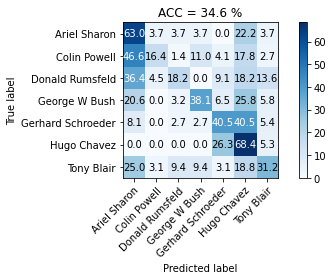

                   precision    recall  f1-score   support

     Ariel Sharon       0.15      0.63      0.25        27
     Colin Powell       0.75      0.16      0.27        73
  Donald Rumsfeld       0.42      0.18      0.25        44
    George W Bush       0.82      0.38      0.52       155
Gerhard Schroeder       0.39      0.41      0.40        37
      Hugo Chavez       0.13      0.68      0.22        19
       Tony Blair       0.32      0.31      0.32        32

         accuracy                           0.35       387
        macro avg       0.43      0.39      0.32       387
     weighted avg       0.60      0.35      0.38       387

Evaluando modelo 6/9
Guardando... KNeighbors


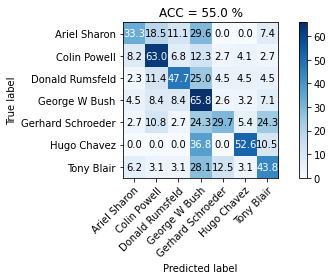

                   precision    recall  f1-score   support

     Ariel Sharon       0.35      0.33      0.34        27
     Colin Powell       0.62      0.63      0.63        73
  Donald Rumsfeld       0.48      0.48      0.48        44
    George W Bush       0.66      0.66      0.66       155
Gerhard Schroeder       0.48      0.30      0.37        37
      Hugo Chavez       0.43      0.53      0.48        19
       Tony Blair       0.33      0.44      0.38        32

         accuracy                           0.55       387
        macro avg       0.48      0.48      0.47       387
     weighted avg       0.55      0.55      0.55       387

Evaluando modelo 7/9
Guardando... Logisticlbfgs


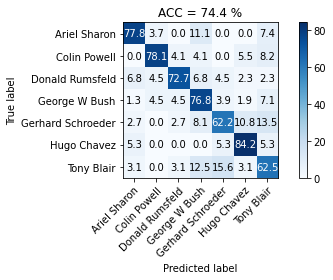

                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.78      0.75        27
     Colin Powell       0.85      0.78      0.81        73
  Donald Rumsfeld       0.73      0.73      0.73        44
    George W Bush       0.88      0.77      0.82       155
Gerhard Schroeder       0.62      0.62      0.62        37
      Hugo Chavez       0.55      0.84      0.67        19
       Tony Blair       0.43      0.62      0.51        32

         accuracy                           0.74       387
        macro avg       0.68      0.73      0.70       387
     weighted avg       0.77      0.74      0.75       387

Evaluando modelo 8/9
Guardando... SVCrbf


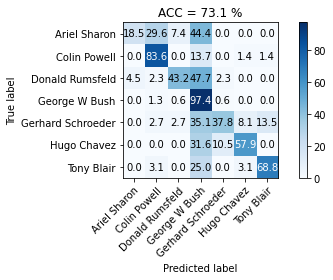

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.19      0.29        27
     Colin Powell       0.82      0.84      0.83        73
  Donald Rumsfeld       0.83      0.43      0.57        44
    George W Bush       0.68      0.97      0.80       155
Gerhard Schroeder       0.78      0.38      0.51        37
      Hugo Chavez       0.69      0.58      0.63        19
       Tony Blair       0.79      0.69      0.73        32

         accuracy                           0.73       387
        macro avg       0.76      0.58      0.62       387
     weighted avg       0.75      0.73      0.70       387

Evaluando modelo 9/9
Guardando... RandomForest


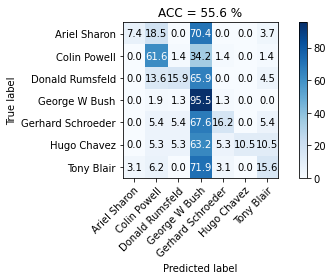

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.07      0.13        27
     Colin Powell       0.70      0.62      0.66        73
  Donald Rumsfeld       0.54      0.16      0.25        44
    George W Bush       0.53      0.95      0.68       155
Gerhard Schroeder       0.55      0.16      0.25        37
      Hugo Chavez       1.00      0.11      0.19        19
       Tony Blair       0.38      0.16      0.22        32

         accuracy                           0.56       387
        macro avg       0.62      0.32      0.34       387
     weighted avg       0.58      0.56      0.48       387



In [11]:
#%% Paso 5: evaluar sobre Xtest
my_model_loaded = joblib.load(filename+".pkl")
path_img = ''
for i in range(len(my_model_loaded)):
    print('Evaluando modelo %d/%d' % (i+1,len(my_model_loaded)))

    ytest_e = my_model_loaded[i].predict(Xtest)
    acc = accuracy_score(ytest,ytest_e)
     
    plot_confusion_matrix(
                          ytest, ytest_e, 
                          classes=lfw_people.target_names,
                          normalize=True,
                          title='ACC = %.1f %%' % (100*acc)
                          )
    plt.autoscale()
    save_fig(path_img,label_models[i])                      
    plt.show()
    
    cr = classification_report(
                               ytest, ytest_e, 
                               labels=range(lfw_people.target_names.shape[0]),
                               target_names=lfw_people.target_names
                               )                          
    #support = #muestras en la clase estudiada
    print(cr)


# Curva ROC multiclase - sobre conjunto de test

Evaluando ROC modelo 1/9
Guardando... ROC curve Naive_GaussianNB


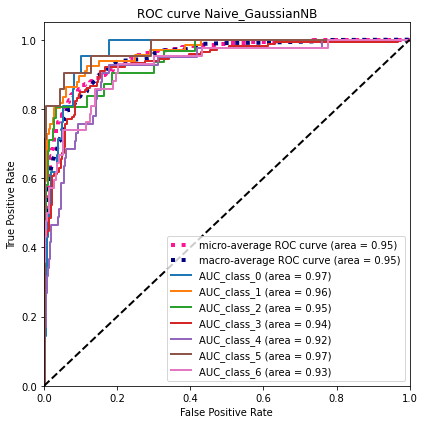

Evaluando ROC modelo 2/9
Guardando... ROC curve SGDlog


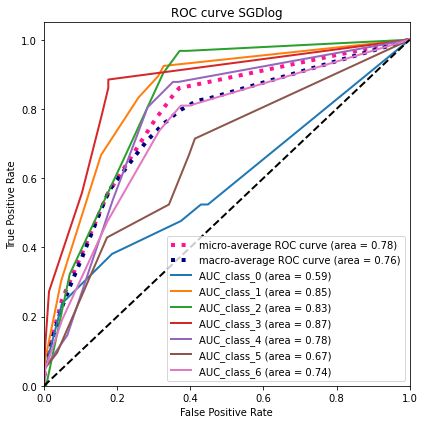

Evaluando ROC modelo 3/9
Guardando... ROC curve LDAsvd


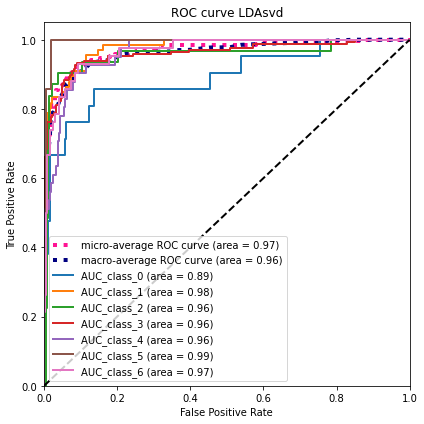

Evaluando ROC modelo 4/9
Guardando... ROC curve LDAeigen


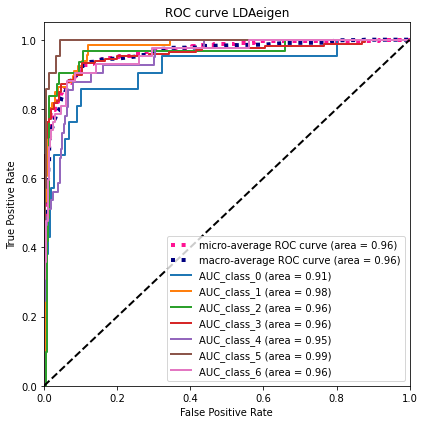

Evaluando ROC modelo 5/9
Guardando... ROC curve QDA


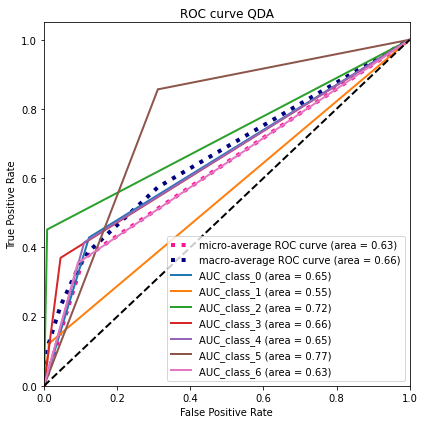

Evaluando ROC modelo 6/9
Guardando... ROC curve KNeighbors


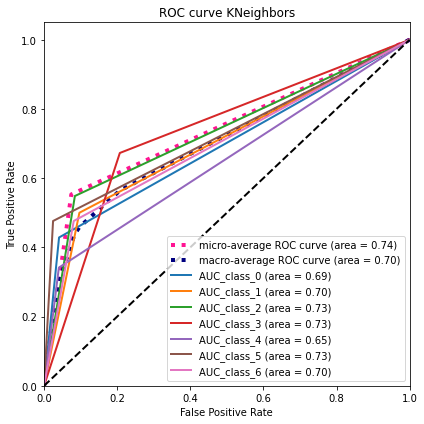

Evaluando ROC modelo 7/9
Guardando... ROC curve Logisticlbfgs


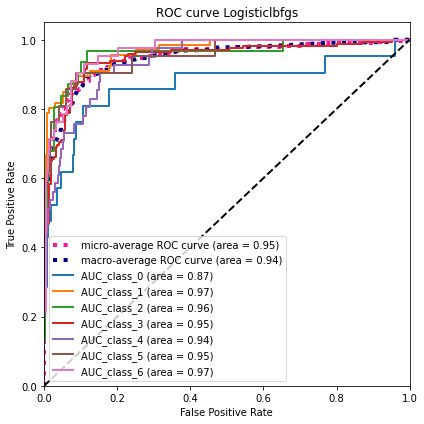

Evaluando ROC modelo 8/9
Guardando... ROC curve SVCrbf


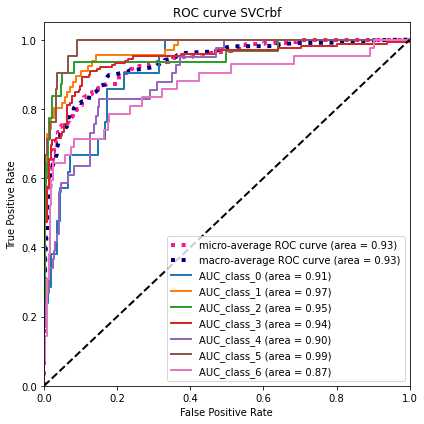

Evaluando ROC modelo 9/9
Guardando... ROC curve RandomForest


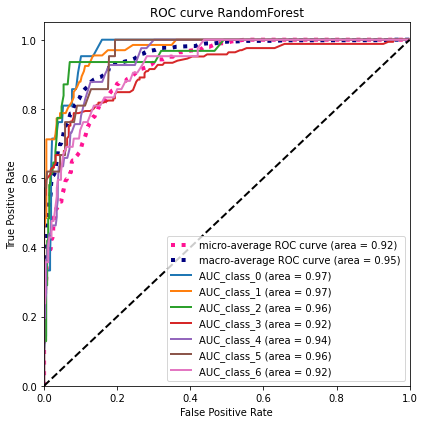

In [39]:
from sklearn.preprocessing import label_binarize

ytrain_b = label_binarize(ytrain, classes=range(lfw_people.target_names.shape[0]))
ytest_b = label_binarize(ytest, classes=range(lfw_people.target_names.shape[0]))

for i in range(len(my_model_loaded)):
    print('Evaluando ROC modelo %d/%d' % (i+1,len(my_model_loaded)))
    try:
      ytest_score = my_model_loaded[i].predict_proba(Xtest) #debe calcularse la funcion de decision o el posterior de la probabilidad
    except:
      ytest_score = my_model_loaded[i].decision_function(Xtest)
    roc_auc, fpr, tpr, n_classes = roc_multiclass(ytest_b,ytest_score)
    roc_auc_mc(roc_auc,fpr,tpr,n_classes,'ROC curve ' + label_models[i],path_img)
    

## A continuación se hará el procedimiento anterior con la construcción de una clase por base estimator que permita generar clasificadores según el modelo de Bayes. Con los siguientes modelos: ingenuo, lineal isotropico, lineal anisotrópico, y cuadrático anisotrópico. 

In [0]:
from sklearn.base import  BaseEstimator, ClassifierMixin
from scipy.stats import multivariate_normal as mn

#Clase Bayes Classifier

class bayes_cla(BaseEstimator, ClassifierMixin):
    def __init__(self, priors=None, alpha=1e-3, tipo=None):
        self.priors = priors
        self.alpha = alpha
        self.tipo = tipo
        return None

    def fit(self, X, y, *_):
        self.classes = np.unique(y)
        Nc = len(self.classes)
        dimN = X.shape[0] #instancias
        dimP = X.shape[1] #atributos
        
        #media y covarianza por cada clase  

        self.mu = np.zeros((Nc,dimP))
        self.Cov = np.zeros((Nc,dimP,dimP))
        self.var = np.zeros((Nc,dimP))
        
        for i in self.classes:
            if self.tipo == 'Naive':
                print(X[y==i].shape[0]/X.shape[0])
                if self.priors == None:
                    self.priors = X[y==i].shape[0]/X.shape[0]
                self.mu[i] = np.array(X[y==i,:].mean(axis=0))
                self.var[i] = np.array(X[y==i].var(axis=0))
                if np.min(self.var[i]) < self.alpha:
                    self.var[i] = self.var[i] + self.alpha

            elif self.tipo == 'LDA':
                if self.priors == None:
                    self.priors = X[y==i].shape[0]/X.shape[0]
                self.mu[i] = X[y==i,:].mean(axis=0)
                self.Cov = np.cov(X.T)
                if np.min(self.Cov) < self.alpha:
                    self.Cov = self.Cov + self.alpha*np.eye(self.Cov.shape[1])

            elif self.tipo == 'QDA':
                if self.priors == None:
                    self.priors = X[y==i].shape[0]/X.shape[0] 
                self.mu[i] = X[y==i,:].mean(axis=0) 
                self.Cov[i] = np.cov(X[y==i,:].T)
                if np.min(self.Cov[i]) < self.alpha:
                    self.Cov[i] = self.Cov[i] + self.alpha*np.eye(self.Cov[i].shape[1])

        return self

    def predict(self, X, *_):
        if self.tipo == 'Naive':
            Nc = len(self.classes)
            dimN = X.shape[0]
            dimP = X.shape[1]
            self.pdfT= np.zeros((Nc,dimN))
            self.pdfs = np.zeros((Nc, dimN, dimP))
            for i in self.classes:
                self.pdfs[i] = np.exp((-(X-self.mu[i])**2)/(2*self.var[i]))/(np.sqrt(2*np.pi*self.var[i]))*self.priors
            print('pdfs',self.pdfs.shape)
            self.pdfT= (self.pdfs).sum(axis=2)
            return np.log(self.pdfT).argmax(axis=0)
        
        elif self.tipo == 'LDA':
            Nc = len(self.classes)
            dimN = X.shape[0]
            dimP = X.shape[1]
            self.pdfs = np.zeros((Nc, dimN, dimN))
            self.pdfT = np.zeros((dimN,Nc))
            for i in self.classes:
                self.pdfs[i] = -1/2*np.dot(np.dot((X-self.mu[i]),np.linalg.inv(self.Cov)),(X-self.mu[i]).T) + np.log(self.priors)
            self.pdfT= (self.pdfs).sum(axis=2)
            return np.argmax((self.pdfT),axis=0)

        elif self.tipo == 'QDA':
            Nc = len(self.classes)
            dimN = X.shape[0]
            dimP = X.shape[1] 
            self.pdfT= np.zeros((Nc,dimN))
            self.pdfs = np.zeros((Nc, dimN, dimN))
            for i in self.classes:
                self.pdfs[i] = -1/2*np.dot(np.dot((X-self.mu[i]),np.linalg.inv(self.Cov[i])),(X-self.mu[i]).T) + np.log(self.priors)
            self.pdfT= (self.pdfs).sum(axis=2)
            return np.argmax(self.pdfT,axis=0)


    def predict_proba(self, X,*_):
        #if self.tipo == 'Naive':
        self.predict(X)
        return np.log(self.pdfT).T#/self.pdfT.max(axis=1)

In [34]:
import numpy as np

Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)
Xtest = np.array(Xtest)
ytest = np.array(ytest)

models = ['Naive','LDA','QDA']
Resul_class = np.zeros((3,1), dtype=object)
for i in range(len(models)):
  Model = bayes_cla(tipo=models[i])
  Model = Model.fit(Xtrain,ytrain)
  Resul_class[i,0] = Model.predict(Xtest)

print(Resul_class)

0.05549389567147614
0.18091009988901222
0.08546059933407325
0.416204217536071
0.07991120976692564
0.05771365149833518
0.12430632630410655
pdfs (7, 387, 1850)
[[array([2, 6, 1, 5, 4, 1, 2, 5, 2, 5, 4, 2, 6, 2, 6, 1, 6, 6, 6, 6, 2, 1,
       4, 6, 4, 2, 2, 3, 4, 3, 4, 4, 5, 5, 4, 2, 5, 5, 4, 2, 4, 5, 4, 2,
       3, 5, 2, 5, 4, 2, 4, 2, 3, 5, 1, 2, 1, 2, 5, 1, 2, 4, 5, 5, 1, 4,
       5, 3, 2, 2, 4, 1, 2, 5, 5, 3, 5, 3, 2, 2, 2, 5, 2, 3, 3, 6, 5, 5,
       2, 4, 5, 5, 1, 4, 2, 4, 2, 6, 3, 2, 5, 5, 2, 2, 0, 4, 2, 1, 4, 2,
       2, 2, 2, 3, 6, 6, 2, 5, 4, 5, 5, 2, 6, 2, 6, 4, 4, 4, 2, 5, 4, 0,
       2, 4, 0, 2, 2, 2, 5, 2, 2, 5, 2, 3, 5, 4, 3, 2, 4, 2, 6, 1, 2, 5,
       6, 5, 4, 1, 5, 3, 2, 5, 5, 2, 3, 4, 4, 6, 2, 2, 2, 1, 5, 4, 0, 2,
       5, 5, 2, 5, 6, 1, 2, 2, 2, 4, 2, 6, 1, 5, 5, 5, 0, 0, 2, 1, 2, 1,
       2, 5, 5, 6, 2, 3, 5, 2, 5, 5, 2, 2, 6, 6, 5, 2, 5, 2, 5, 4, 5, 4,
       0, 4, 1, 2, 5, 3, 4, 5, 6, 1, 1, 4, 1, 5, 6, 1, 1, 2, 2, 5, 6, 2,
       2, 3, 2, 4, 1, 5, 2, 4, 5, 5, 

## Comparacion de los modelos de la clase con los de Sklearn

In [38]:

yG=GaussianNB()
yG.fit(Xtrain,ytrain)
Y1 = yG.predict(Xtest)

yLDA=LinearDiscriminantAnalysis()
yLDA.fit(Xtrain,ytrain)
Y2 = yLDA.predict(Xtest)

yQDA=QuadraticDiscriminantAnalysis()
yQDA.fit(Xtrain,ytrain)
Y3=yQDA.predict(Xtest)

#print(yG.predict_proba(Xtest))
#print(yLDA.predict_proba(Xtest))
#print(yQDA.predict_proba(Xtest))


print('comparación de la clase con modelo de sklearn',models[0],':',np.where(Resul_class[0,0]==Y1)[0].shape[0])
print('comparación de la clase con modelo de sklearn',models[1],':',np.where(Resul_class[1,0]==Y2)[0].shape[0])
print('comparación de la clase con modelo de sklearn',models[2],':',np.where(Resul_class[2,0]==Y3)[0].shape[0])
print('\n')
print('comparación de la clase con modelo Naive con ytest',np.where(Resul_class[0,0]==ytest)[0].shape[0])
print('comparación de la clase con modelo LDA con ytest',np.where(Resul_class[1,0]==ytest)[0].shape[0])
print('comparación de la clase con modelo QDA con ytest',np.where(Resul_class[2,0]==ytest)[0].shape[0])
print('\n')
print('comparación de modelo de sklearn Naive con ytest',np.where(Y1==ytest)[0].shape[0])
print('comparación de modelo de sklearn LDA con ytest',np.where(Y2==ytest)[0].shape[0])
print('comparación de modelo de sklearn QDA con ytest',np.where(Y3==ytest)[0].shape[0])

comparación de la clase con modelo de sklearn Naive : 213
comparación de la clase con modelo de sklearn LDA : 210
comparación de la clase con modelo de sklearn QDA : 145


comparación de la clase con modelo Naive con ytest 121
comparación de la clase con modelo LDA con ytest 196
comparación de la clase con modelo QDA con ytest 238


comparación de modelo de sklearn Naive con ytest 212
comparación de modelo de sklearn LDA con ytest 285
comparación de modelo de sklearn QDA con ytest 104


# Grafica de curvas ROC para los modelos de la clase por base estimador de bayes

0.05549389567147614
0.18091009988901222
0.08546059933407325
0.416204217536071
0.07991120976692564
0.05771365149833518
0.12430632630410655
pdfs (7, 387, 1850)
Guardando... ROC curve print


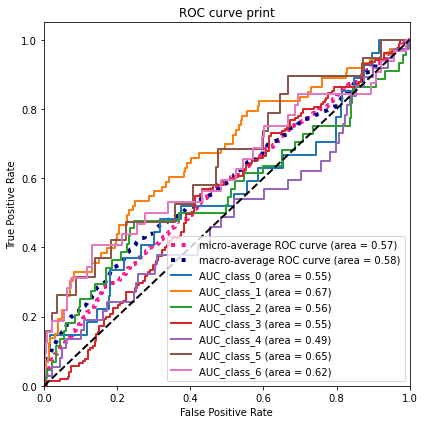

In [45]:
from sklearn.preprocessing import label_binarize

ytrain_b = label_binarize(ytrain, classes=range(lfw_people.target_names.shape[0]))
ytest_b = label_binarize(ytest, classes=range(lfw_people.target_names.shape[0]))
"""
for i in range(len(models)):
    print('Evaluando ROC modelo %d/%d' % (i+1,len(models)))
    try:
      ytest_score = my_model_loaded[i].predict_proba(Xtest) #debe calcularse la funcion de decision o el posterior de la probabilidad
    except:
      ytest_score = my_model_loaded[i].decision_function(Xtest)
    roc_auc, fpr, tpr, n_classes = roc_multiclass(ytest_b,ytest_score)
    roc_auc_mc(roc_auc,fpr,tpr,n_classes,'ROC curve ' + label_models[i],path_img)
"""
ytest_score = bayes_cla(tipo='Naive').fit(Xtrain, ytrain).predict_proba(Xtest) #debe calcularse la funcion de decision o el posterior de la probabilidad
roc_auc, fpr, tpr, n_classes = roc_multiclass(ytest_b,ytest_score)
roc_auc_mc(roc_auc,fpr,tpr,n_classes,'ROC curve ' + 'print',path_img)